In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Advanced EDA for the COVID-19 Virus

Welcome to the second part of the ANALYSE section of the COVID-19 project. In this code-along session, you will get the opportunity to:

* Explore how to get the daily differences for the cumulative cases.
* Calculate the daily growth rate per country.
* Compare South Africa's growth since case one against other countries.
* Plot a logarithmic graph of the cumulative cases.

This section will be a more interactive and code-along compared to the first one. 

Enjoy and wash your hands!

In [0]:
#import local cases
confirmed_results = pd.read_csv('https://raw.githubusercontent.com/dsfsi/covid19za/master/data/covid19za_timeline_confirmed.csv')
#import global cases
global_confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

## Daily differences in the cumulative cases in South Africa

In this section, we will investigate how to figure out the daily growth/change in the number of cases. Firstly, lets complete the cumulative cases graph we did last week.

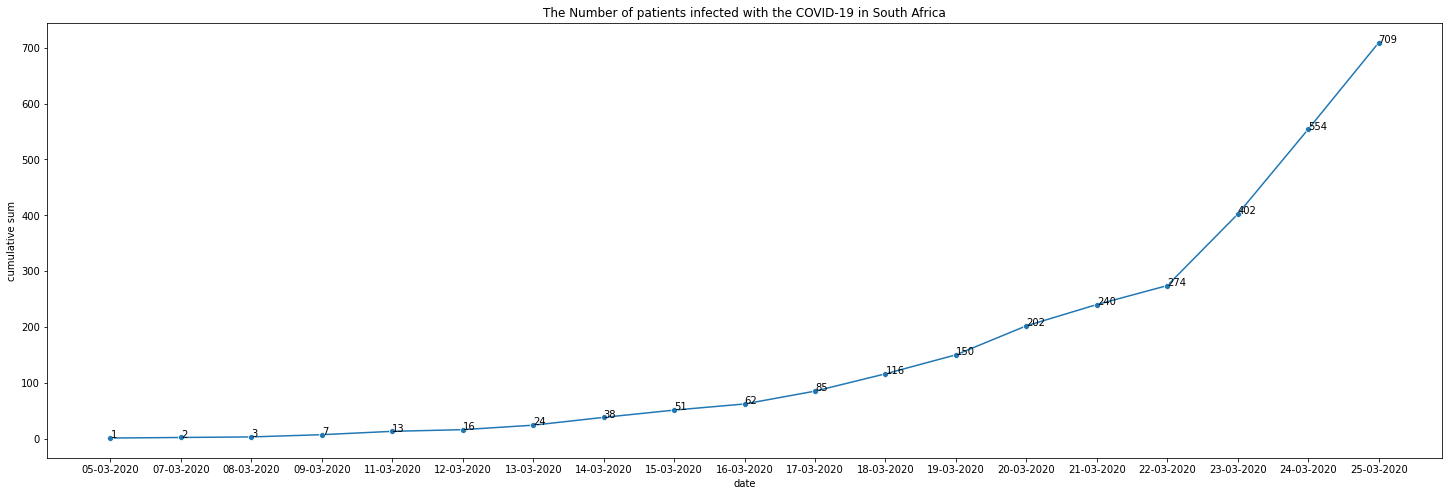

In [4]:
cumulative_cases = confirmed_results[['date', 'country']].groupby('date').count().cumsum().reset_index().rename(columns={'country':'cumulative sum'}) #create cumulative dataframe

plt.figure(figsize=(25,8)) #Set figure size
plt.title('The Number of patients infected with the COVID-19 in South Africa')


ax = sns.lineplot(data=cumulative_cases, x='date', y='cumulative sum', 
                  marker='o', 
                  dashes=False)

for i in cumulative_cases.groupby('date'):
    #i[1] is a grouped data frame; looping through each data row in the cumulative dataframe
    for x,y,m in i[1][['date','cumulative sum','cumulative sum']].values:  # x = x value; y = y_value ; m = marker value
        ax.text(x,y,f'{m:.0f}') #ax.text will 

plt.show()

Next, we will do our calculted metric! Our function should return the daily difference for each date recorded. Example:

Daily Difference from 12-03-2020 to 13-03-2020 : 8 <br>
Daily Difference from 09-03-2020 to 11-03-2020 : 6

Those differences would then have to be appended to our original dataframe.

In [5]:
confirmed_results

case_id        date  YYYYMMDD  ...         gender   transmission_type     type
0          1  05-03-2020  20200305  ...           male  Travelled to Italy   travel
1          2  07-03-2020  20200307  ...         female  Travelled to Italy   travel
2          3  08-03-2020  20200308  ...         female  Travelled to Italy   travel
3          4  09-03-2020  20200309  ...           male  Travelled to Italy   travel
4          5  09-03-2020  20200309  ...         female  Travelled to Italy   travel
..       ...         ...       ...  ...            ...                 ...      ...
704      705  25-03-2020  20200325  ...  not specified                 NaN  pending
705      706  25-03-2020  20200325  ...  not specified                 NaN  pending
706      707  25-03-2020  20200325  ...  not specified                 NaN  pending
707      708  25-03-2020  20200325  ...  not specified                 NaN  pending
708      709  25-03-2020  20200325  ...  not specified                 NaN  pending

[709 rows x 10 columns]

In [7]:
cum_sum = confirmed_results[['date', 'country']].groupby('date').count().cumsum().reset_index().rename(columns={'country':'cumulative sum'})

case_id        date  YYYYMMDD  ...   transmission_type     type cumulative sum
0          1  05-03-2020  20200305  ...  Travelled to Italy   travel              1
1          2  07-03-2020  20200307  ...  Travelled to Italy   travel              2
2          3  08-03-2020  20200308  ...  Travelled to Italy   travel              3
3          4  09-03-2020  20200309  ...  Travelled to Italy   travel              7
4          5  09-03-2020  20200309  ...  Travelled to Italy   travel              7
..       ...         ...       ...  ...                 ...      ...            ...
704      705  25-03-2020  20200325  ...                 NaN  pending            709
705      706  25-03-2020  20200325  ...                 NaN  pending            709
706      707  25-03-2020  20200325  ...                 NaN  pending            709
707      708  25-03-2020  20200325  ...                 NaN  pending            709
708      709  25-03-2020  20200325  ...                 NaN  pending            709

[709 rows x 11 columns]

In [0]:
cum_sum = confirmed_results[['date', 'country']].groupby('date').count().cumsum().reset_index().rename(columns={'country':'cumulative sum'})

cum_sum['daily difference'] = cum_sum['cumulative sum'].diff().fillna(0).astype(np.int)

In [16]:
cum_sum

date  cumulative sum  daily difference
0   05-03-2020               1                 0
1   07-03-2020               2                 1
2   08-03-2020               3                 1
3   09-03-2020               7                 4
4   11-03-2020              13                 6
5   12-03-2020              16                 3
6   13-03-2020              24                 8
7   14-03-2020              38                14
8   15-03-2020              51                13
9   16-03-2020              62                11
10  17-03-2020              85                23
11  18-03-2020             116                31
12  19-03-2020             150                34
13  20-03-2020             202                52
14  21-03-2020             240                38
15  22-03-2020             274                34
16  23-03-2020             402               128
17  24-03-2020             554               152
18  25-03-2020             709               155

In [18]:
pd.merge(confirmed_results, cum_sum, on='date')

case_id        date  YYYYMMDD  ...     type cumulative sum daily difference
0          1  05-03-2020  20200305  ...   travel              1                0
1          2  07-03-2020  20200307  ...   travel              2                1
2          3  08-03-2020  20200308  ...   travel              3                1
3          4  09-03-2020  20200309  ...   travel              7                4
4          5  09-03-2020  20200309  ...   travel              7                4
..       ...         ...       ...  ...      ...            ...              ...
704      705  25-03-2020  20200325  ...  pending            709              155
705      706  25-03-2020  20200325  ...  pending            709              155
706      707  25-03-2020  20200325  ...  pending            709              155
707      708  25-03-2020  20200325  ...  pending            709              155
708      709  25-03-2020  20200325  ...  pending            709              155

[709 rows x 12 columns]

# Daily growth for each country

Let's apply this code to get the daily change for each country

In [176]:
pd.set_option("display.max_columns", 400)

glob_df = global_confirmed.drop(columns=['Lat', 'Long'])
glob_df.groupby(by='Country/Region').sum().T

Country/Region  Afghanistan  Albania  Algeria  Andorra  Angola  \
1/22/20                   0        0        0        0       0   
1/23/20                   0        0        0        0       0   
1/24/20                   0        0        0        0       0   
1/25/20                   0        0        0        0       0   
1/26/20                   0        0        0        0       0   
...                     ...      ...      ...      ...     ...   
3/29/20                 120      212      511      334       7   
3/30/20                 170      223      584      370       7   
3/31/20                 174      243      716      376       7   
4/1/20                  237      259      847      390       8   
4/2/20                  273      277      986      428       8   

Country/Region  Antigua and Barbuda  Argentina  Armenia  Australia  Austria  \
1/22/20                           0          0        0          0        0   
1/23/20                           0          0        0          0        0   
1/24/20                           0          0        0          0        0   
1/25/20                           0          0        0          0        0   
1/26/20                           0          0        0          4        0   
...                             ...        ...      ...        ...      ...   
3/29/20                           7        745      424       3984     8788   
3/30/20                           7        820      482       4361     9618   
3/31/20                           7       1054      532       4559    10180   
4/1/20                            7       1054      571       4862    10711   
4/2/20                            9       1133      663       5116    11129   

Country/Region  Azerbaijan  Bahamas  Bahrain  Bangladesh  Barbados  Belarus  \
1/22/20                  0        0        0           0         0        0   
1/23/20                  0        0        0           0         0        0   
1/24/20                  0        0        0           0         0        0   
1/25/20                  0        0        0           0         0        0   
1/26/20                  0        0        0           0         0        0   
...                    ...      ...      ...         ...       ...      ...   
3/29/20                209       11      499          48        33       94   
3/30/20                273       14      515          49        33      152   
3/31/20                298       14      567          51        34      152   
4/1/20                 359       21      569          54        34      163   
4/2/20                 400       24      643          56        46      304   

Country/Region  Belgium  Belize  Benin  Bhutan  Bolivia  \
1/22/20               0       0      0       0        0   
1/23/20               0       0      0       0        0   
1/24/20               0       0      0       0        0   
1/25/20               0       0      0       0        0   
1/26/20               0       0      0       0        0   
...                 ...     ...    ...     ...      ...   
3/29/20           10836       2      6       4       81   
3/30/20           11899       3      6       4       97   
3/31/20           12775       3      9       4      107   
4/1/20            13964       3     13       4      115   
4/2/20            15348       3     13       5      123   

Country/Region  Bosnia and Herzegovina  Botswana  Brazil  Brunei  Bulgaria  \
1/22/20                              0         0       0       0         0   
1/23/20                              0         0       0       0         0   
1/24/20                              0         0       0       0         0   
1/25/20                              0         0       0       0         0   
1/26/20                              0         0       0       0         0   
...                                ...       ...     ...     ...       ...   
3/29/20                            323         0    42

In [0]:
def daily_diff(df, country):

  df = df.groupby(by='Country/Region').sum().T #group countries by regions/states then transpose the dataframe so that dates are rows and not columns
  df = df.reset_index().rename(columns={'index':'Date'}).rename_axis(None, axis=1) #reset your index so date is converted to a column; then rename the index to None

  df = df[['Date', country]] #select your country
  df['Date'] = pd.to_datetime(df['Date']) #change date to datetime

  df['daily difference'] = df[country].diff().fillna(0).astype(np.int) #calculate the differences for each day
  df.rename(columns={country : 'cumulative cases'}, inplace=True)

  return df

In [227]:
daily_diff(glob_df, 'South Africa')


Date  cumulative cases  daily difference
0  2020-01-22                 0                 0
1  2020-01-23                 0                 0
2  2020-01-24                 0                 0
3  2020-01-25                 0                 0
4  2020-01-26                 0                 0
..        ...               ...               ...
67 2020-03-29              1280                93
68 2020-03-30              1326                46
69 2020-03-31              1353                27
70 2020-04-01              1380                27
71 2020-04-02              1462                82

[72 rows x 3 columns]

Let's see how South Africa's daily growth looks:

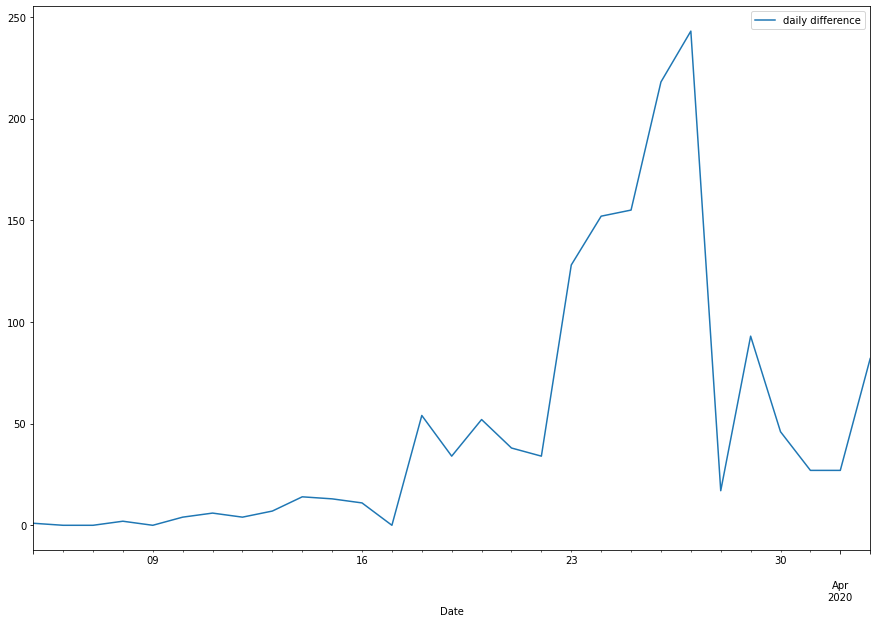

In [229]:
df_sa = daily_diff(glob_df, 'South Africa')

df_sa[df_sa['cumulative cases'] > 0].plot(x='Date', y='daily difference', figsize=(15,10))

In [0]:
china = daily_diff(glob_df, 'China')
italy = daily_diff(glob_df, 'Italy')
usa = daily_diff(glob_df, 'US')
s_korea = daily_diff(glob_df, 'Korea, South')
sa = daily_diff(glob_df, 'South Africa')

## Comparing South Africa's COVID-19 growth vs other countries

For this example, we will use the countries:

* South Africa
* South Korea
* USA
* Italy
* China

We will be plotting the dataframes produced by the function, ```daily_diff```, we created previously pn the same axis. Pandas has a built in plotting function.

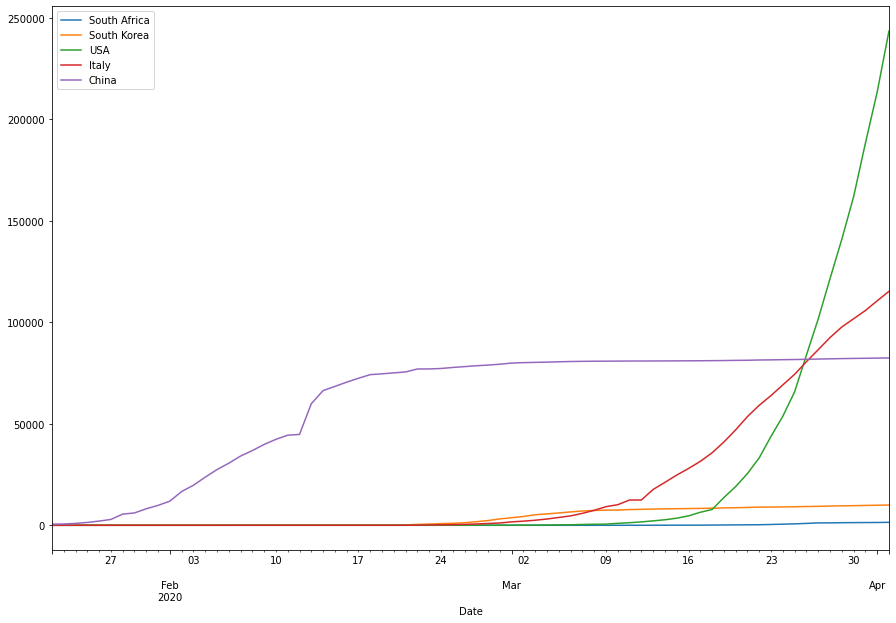

In [224]:
ax = sa.plot(x='Date', y='cumulative cases' , label='South Africa', figsize=(15,10))
s_korea.plot(x='Date', y='cumulative cases' , label='South Korea', ax=ax)
usa.plot(x='Date', y='cumulative cases' , label='USA', ax=ax)
italy.plot(x='Date', y='cumulative cases' , label='Italy', ax=ax)
china.plot(x='Date', y='cumulative cases' , label='China', ax=ax)


### Not the greatest graph to compare! 

From this graph, we can't tell how South Africa is doing against, let's say, Italy. This is because the cases have a very large difference in number (1462 cases in South Africa versus 115242 cases in Italy) <br>

<br>

In this situation, **logging** your graph will help give a better comparison. Have a look below:

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


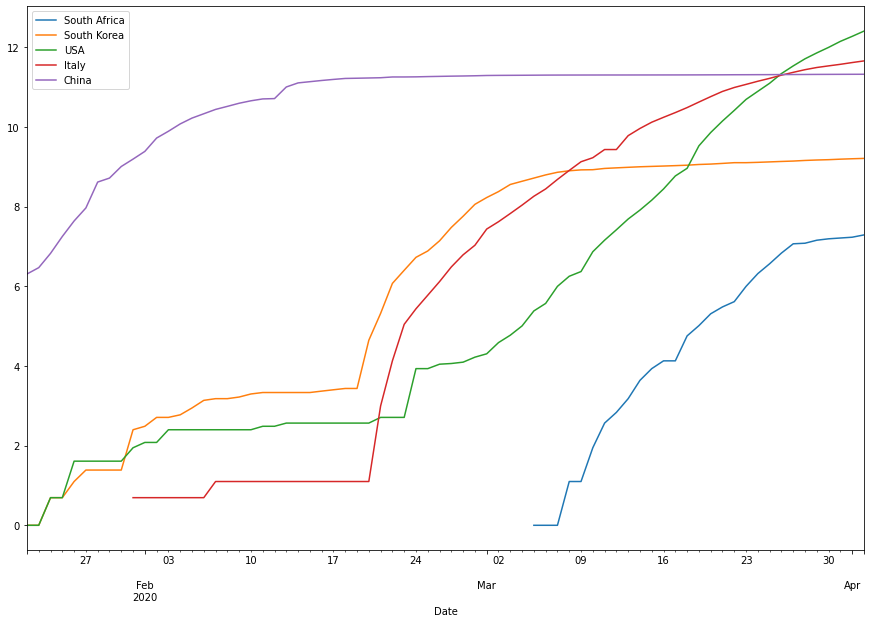

In [220]:
sa['log'] = np.log(sa['cumulative cases'])
s_korea['log'] = np.log(s_korea['cumulative cases'])
usa['log'] = np.log(usa['cumulative cases'])
italy['log'] = np.log(italy['cumulative cases'])
china['log'] = np.log(china['cumulative cases'])

ax = sa.plot(x='Date', y='log' , label='South Africa', figsize=(15,10))
s_korea.plot(x='Date', y='log' , label='South Korea', ax=ax)
usa.plot(x='Date', y='log' , label='USA', ax=ax)
italy.plot(x='Date', y='log' , label='Italy', ax=ax)
china.plot(x='Date', y='log' , label='China', ax=ax)

From this graph, we can get a better insight into the patterns of each country and how they compare to each other. <br>
<br>
Looking at the graph:

1. South Korea has indeed "flattened their curve" to some extent
2. The USA has not dealt with the spread well and this could be due to a particular carrot top in setting the policy of emergencies.
3. South Africa has already seen a slight decrease in the growth of the virus. 